In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [4]:
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houseNumData = pd.DataFrame(traindata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [6]:
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


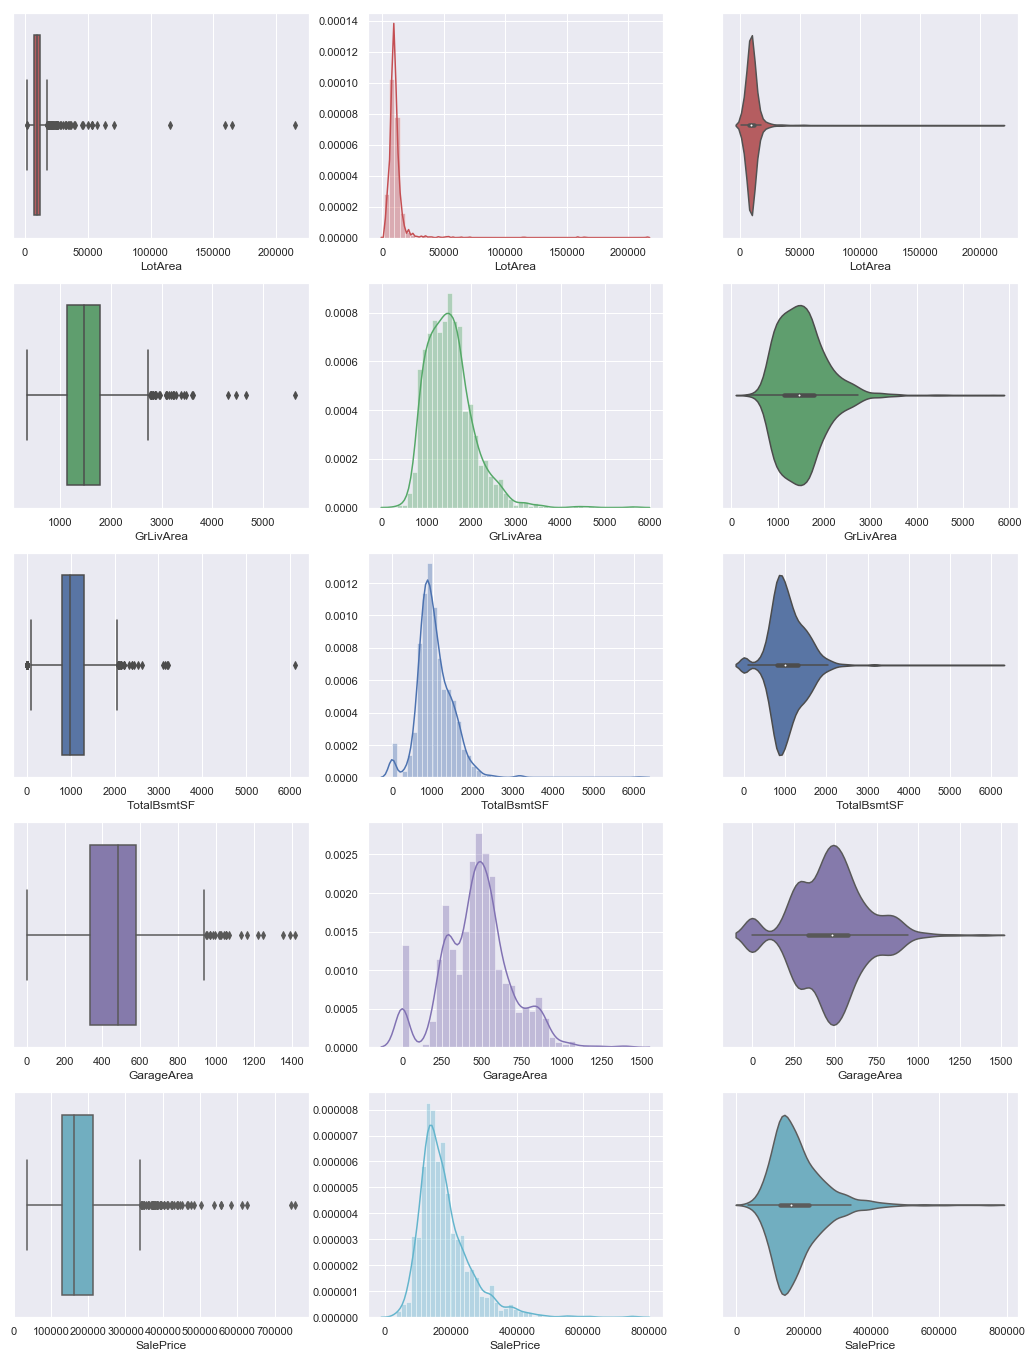

In [7]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in houseNumData:
    sb.boxplot(houseNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(houseNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(houseNumData[var], color = colors[count], ax = axes[count,2])
    count += 1

In [8]:
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


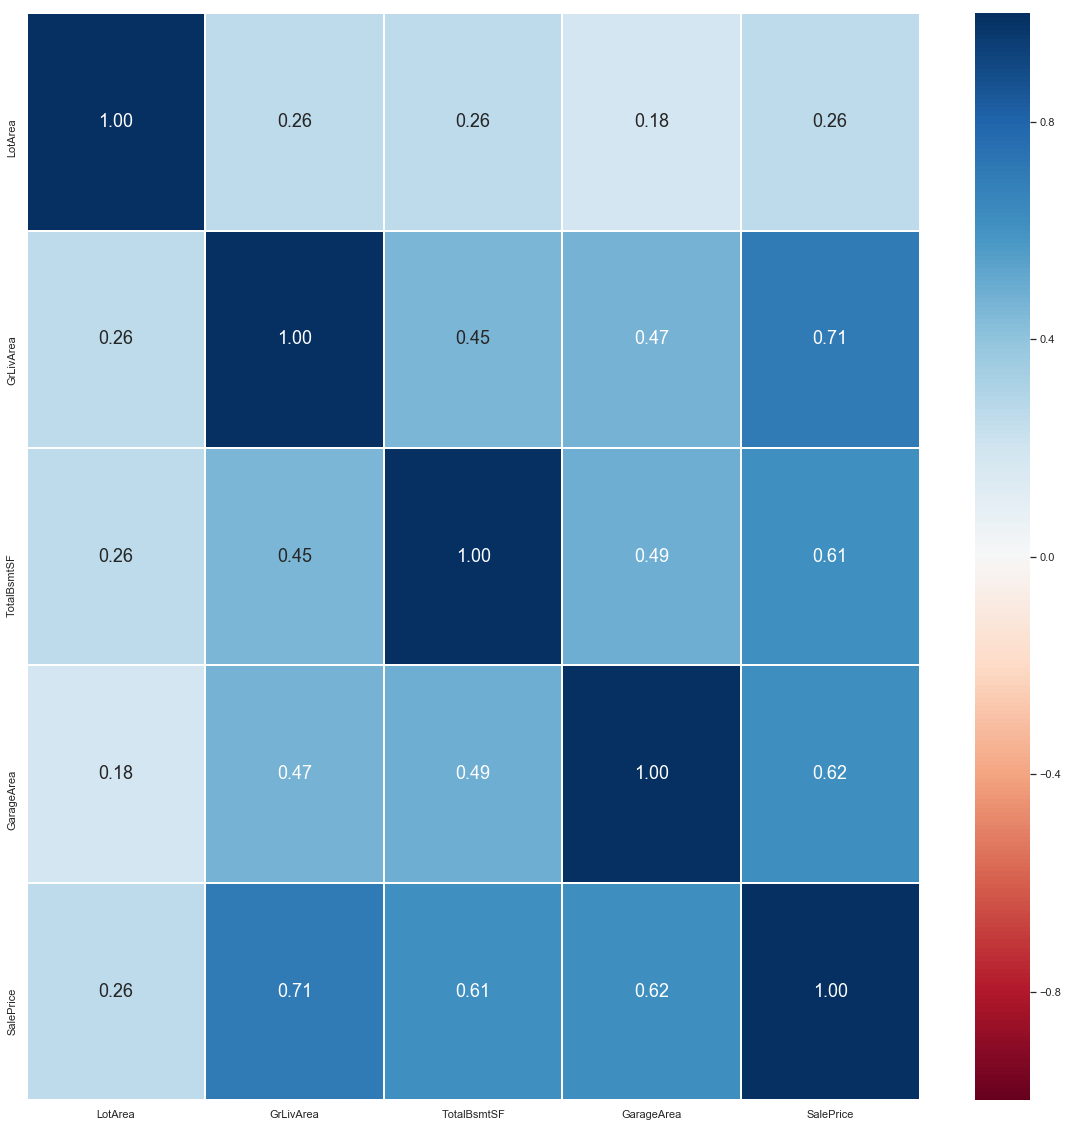

In [9]:
print(houseNumData.corr())

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

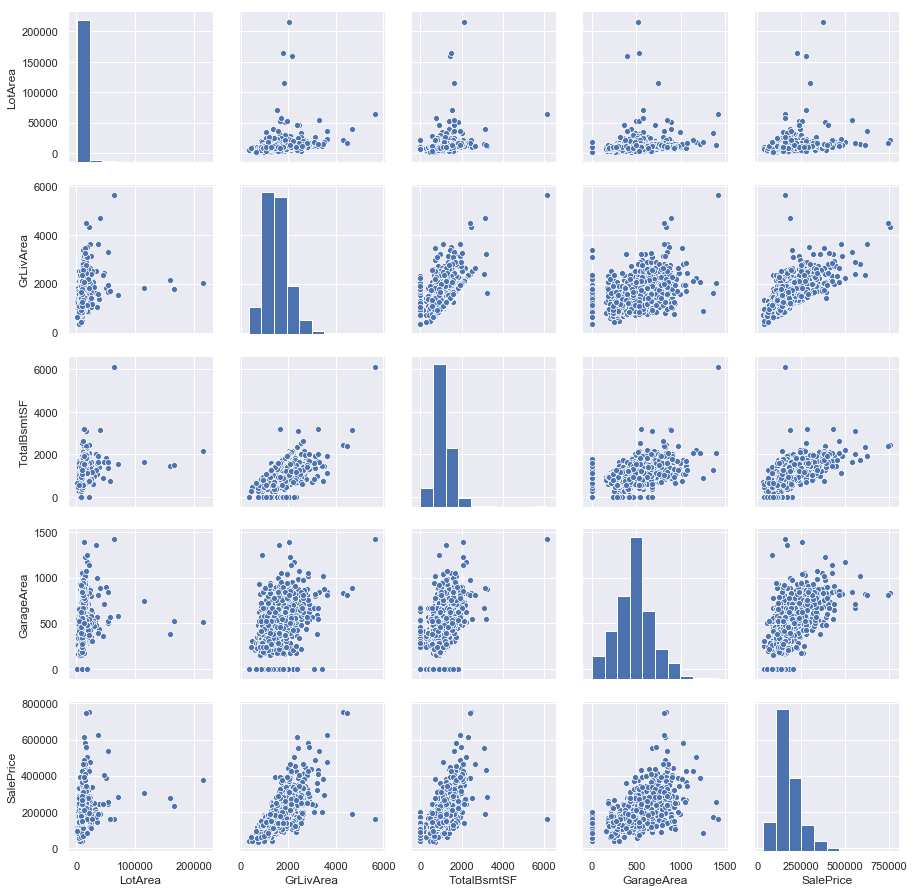

In [10]:
sb.pairplot(data = houseNumData)

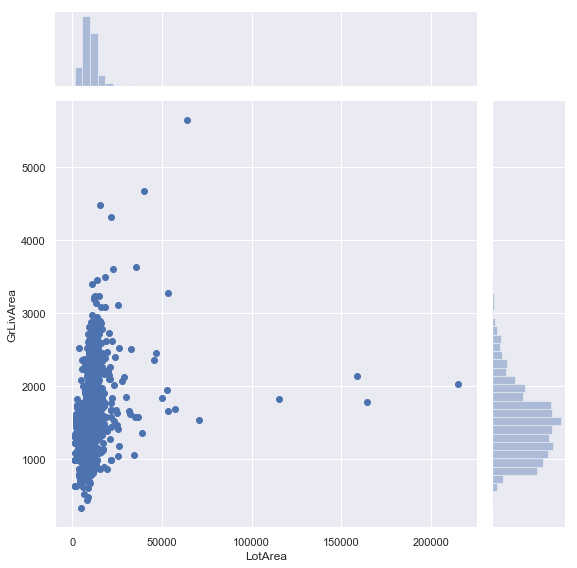

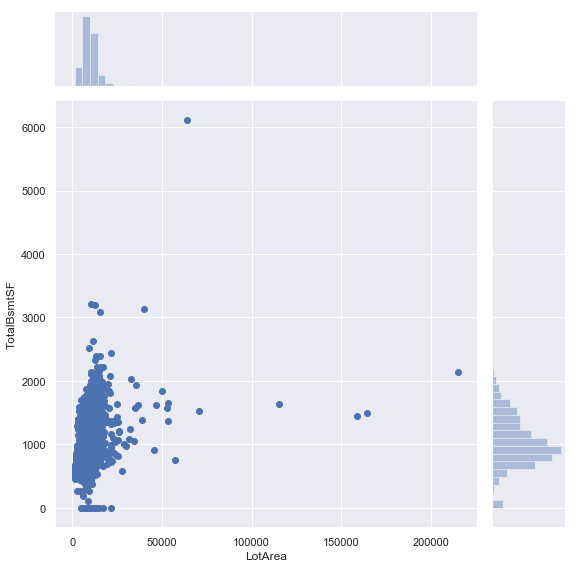

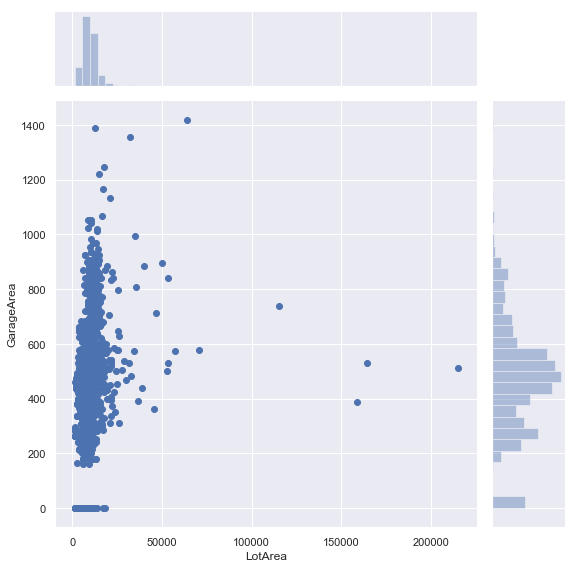

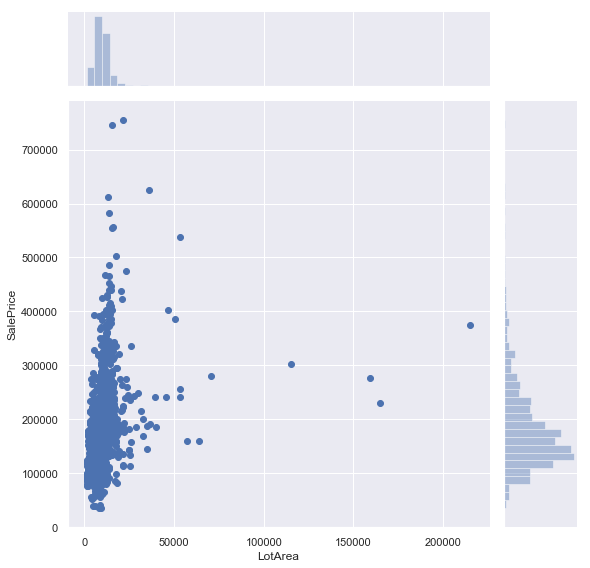

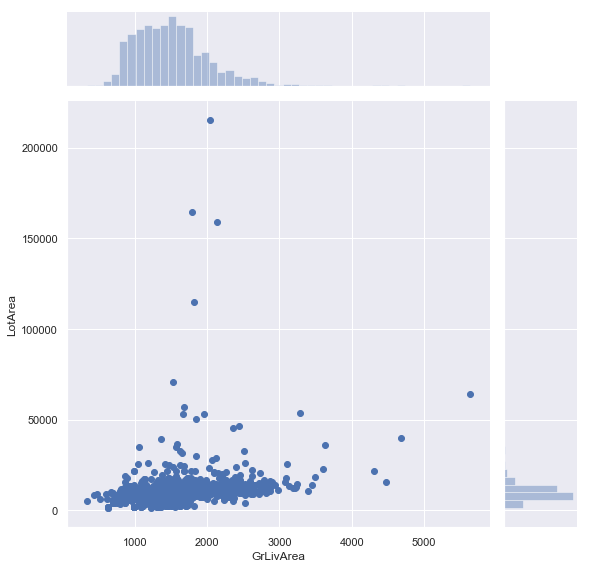

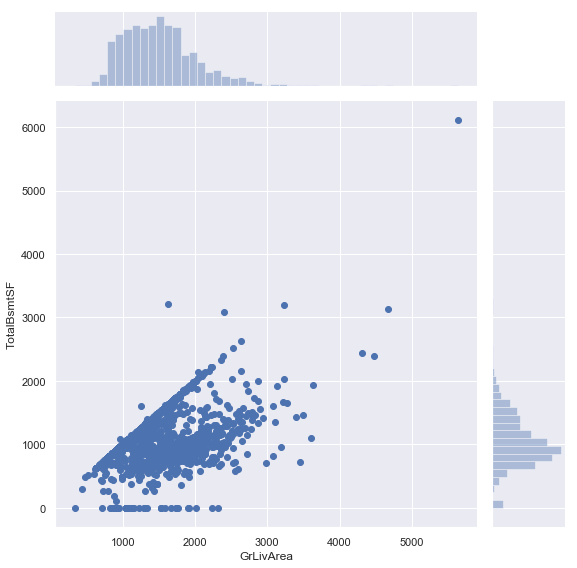

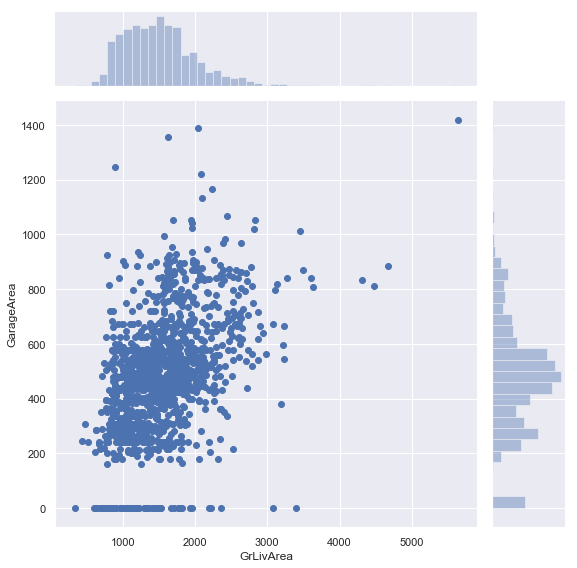

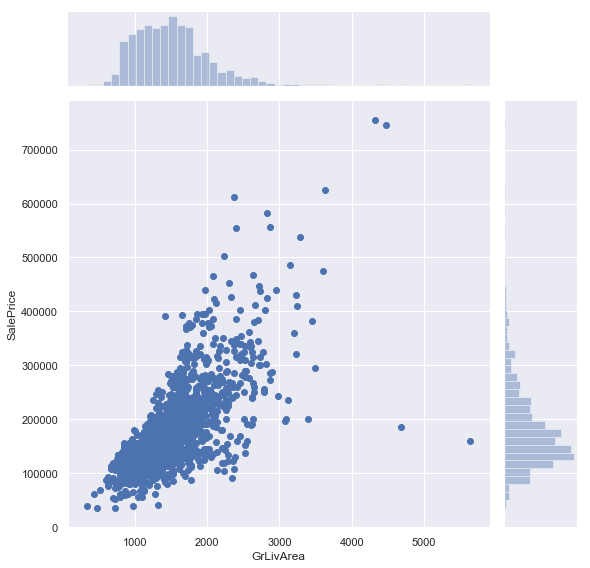

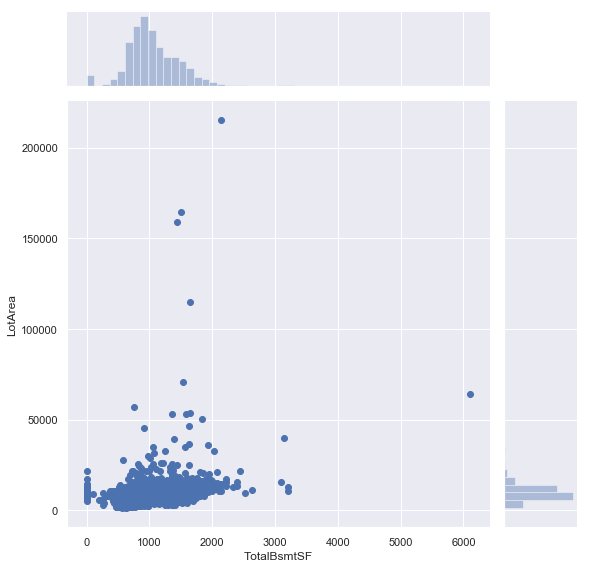

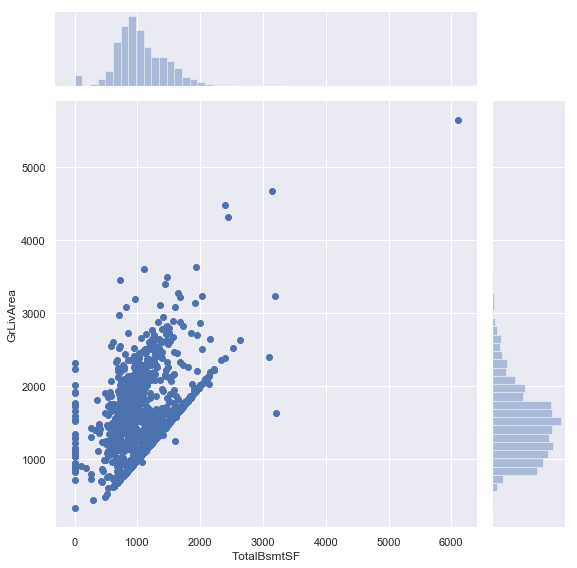

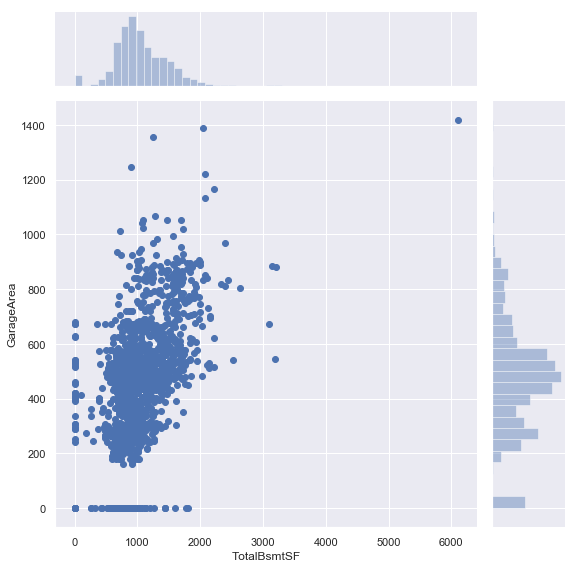

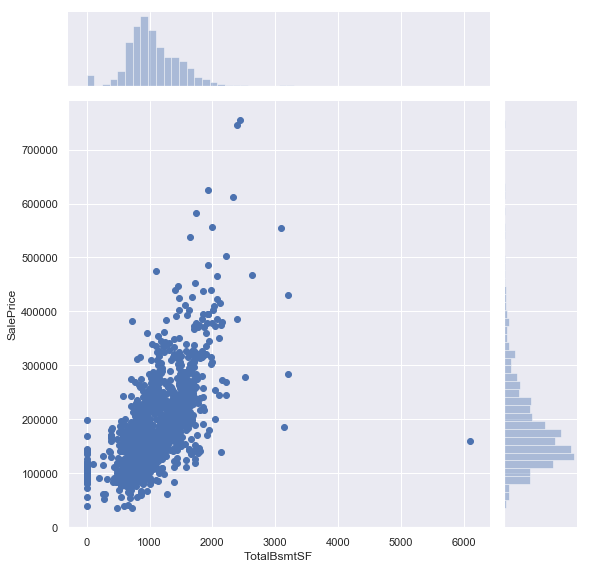

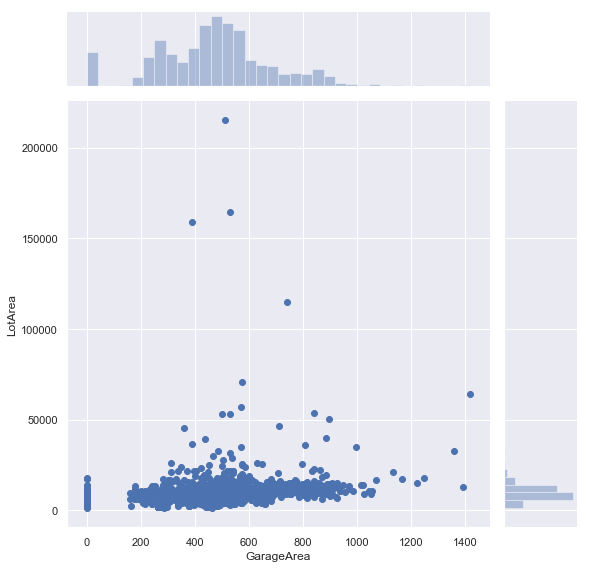

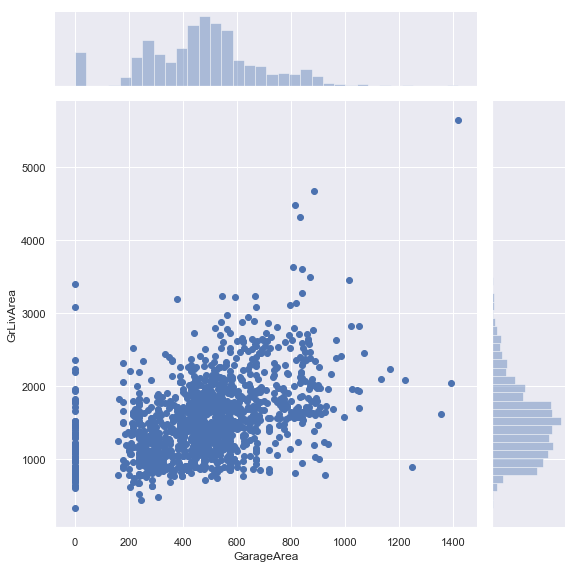

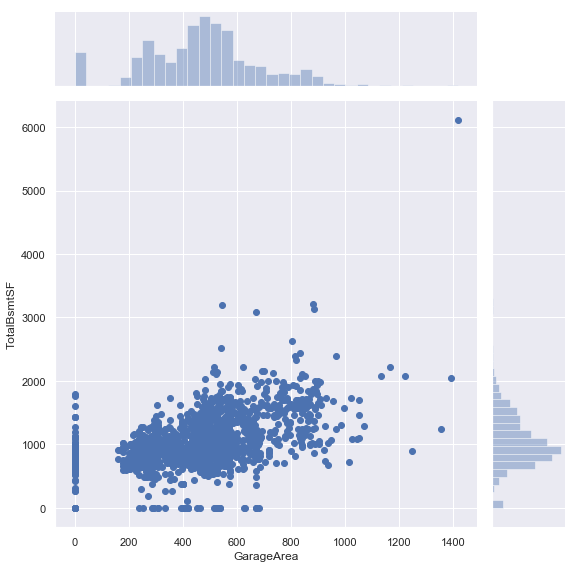

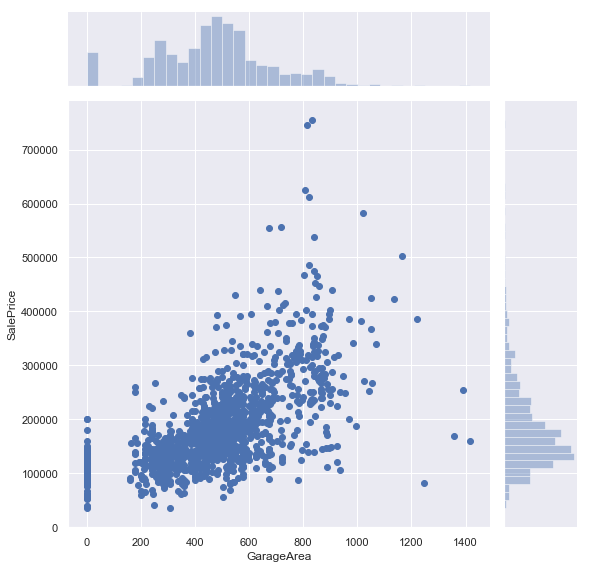

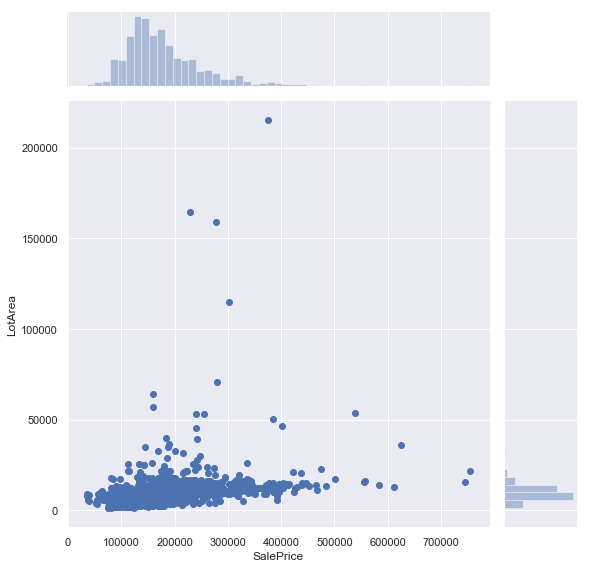

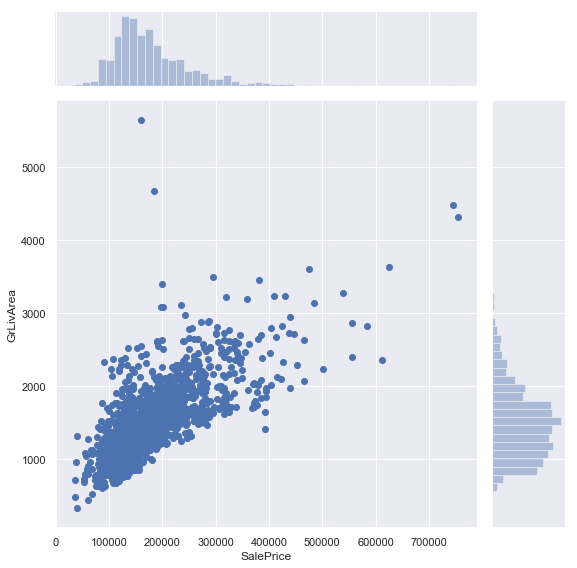

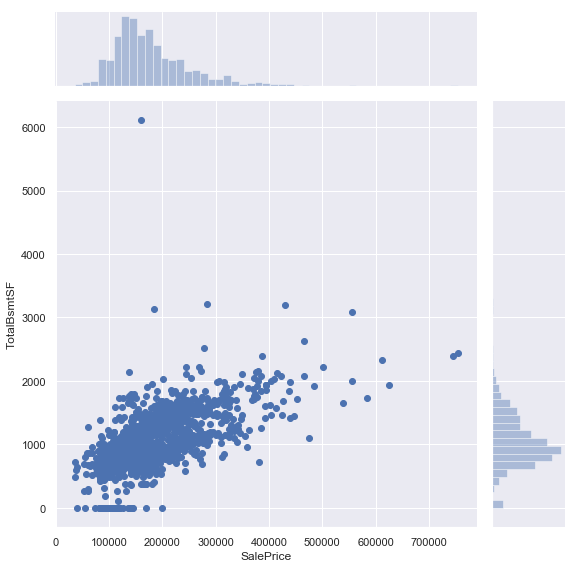

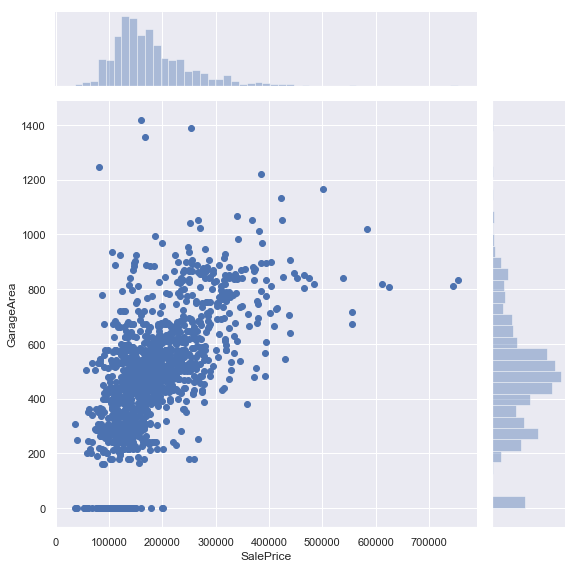

In [11]:
for var1 in houseNumData:
    for var2 in houseNumData:
        if (var1 != var2):
            sb.jointplot(x = houseNumData[var1], y = houseNumData[var2], height = 8)

In [ ]:
# garage area has strongest correlation with saleprice

In [12]:
houseCatData = pd.DataFrame(traindata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [13]:
houseCatData.info()
houseCatData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass      1460 non-null int64
Neighborhood    1460 non-null object
BldgType        1460 non-null object
OverallQual     1460 non-null int64
dtypes: int64(2), object(2)
memory usage: 45.7+ KB


,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [14]:
houseCatData = pd.DataFrame(houseCatData.astype('category'))
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass      1460 non-null category
Neighborhood    1460 non-null category
BldgType        1460 non-null category
OverallQual     1460 non-null category
dtypes: category(4)
memory usage: 7.9 KB


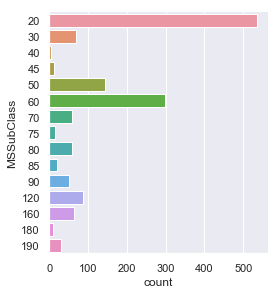

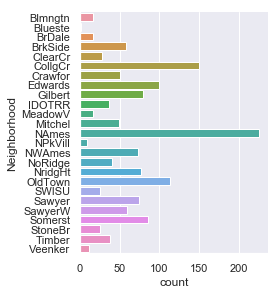

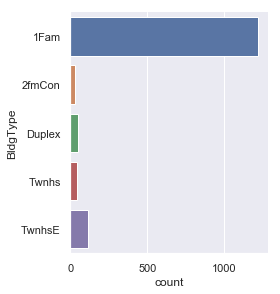

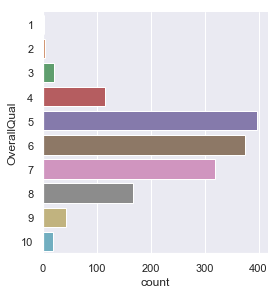

In [16]:
sb.catplot(y = 'MSSubClass', data = houseCatData, kind = 'count', height = 4)
sb.catplot(y = 'Neighborhood', data = houseCatData, kind = 'count', height = 4)
sb.catplot(y = 'BldgType', data = houseCatData, kind = 'count', height = 4)
sb.catplot(y = 'OverallQual', data = houseCatData, kind = 'count', height = 4)

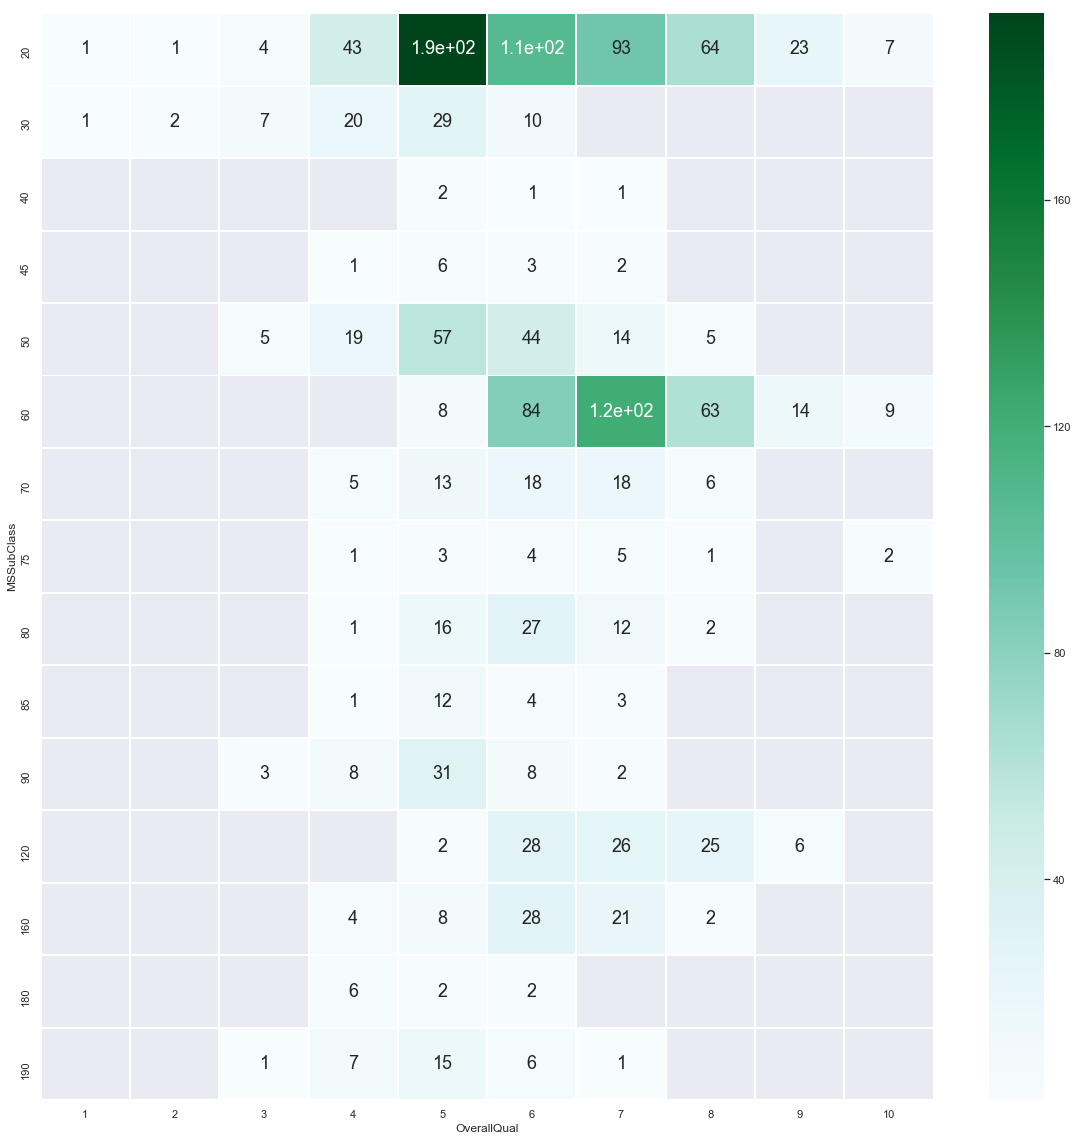

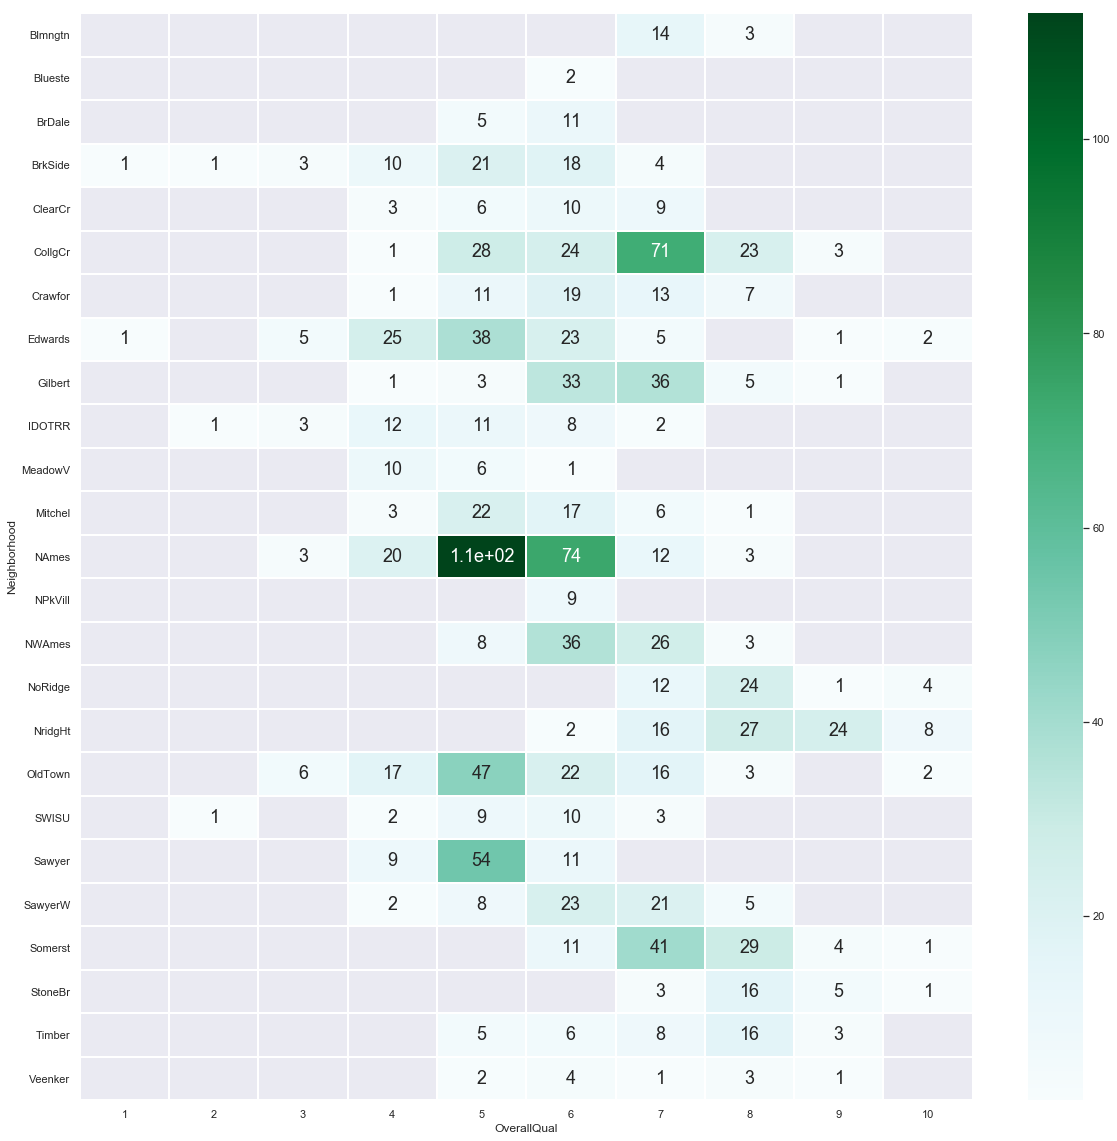

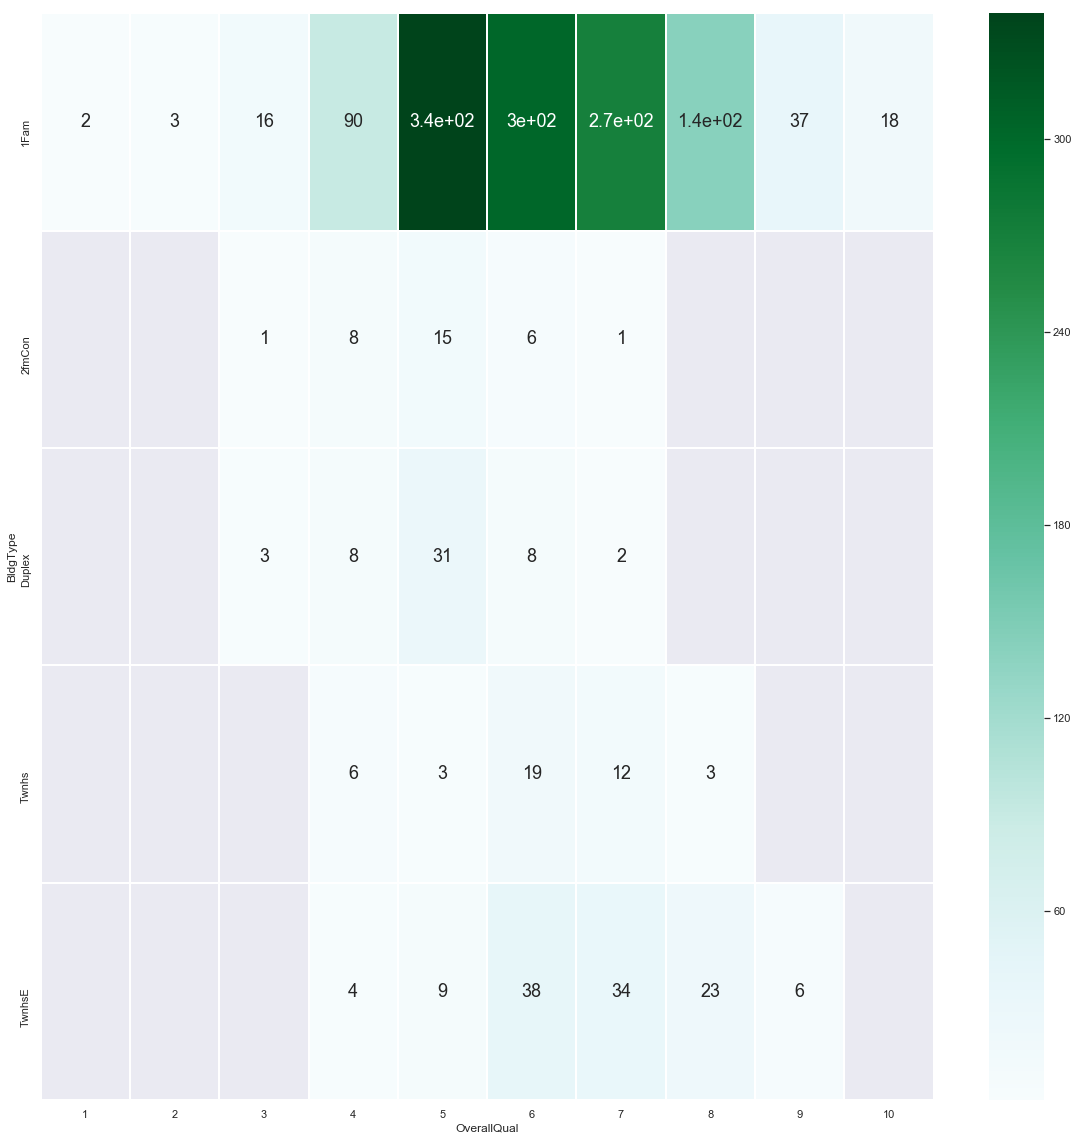

In [22]:
dualtype_data = houseCatData[houseCatData.isnull() == False]

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(dualtype_data.groupby(['MSSubClass', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(dualtype_data.groupby(['Neighborhood', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(dualtype_data.groupby(['BldgType', 'OverallQual']).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

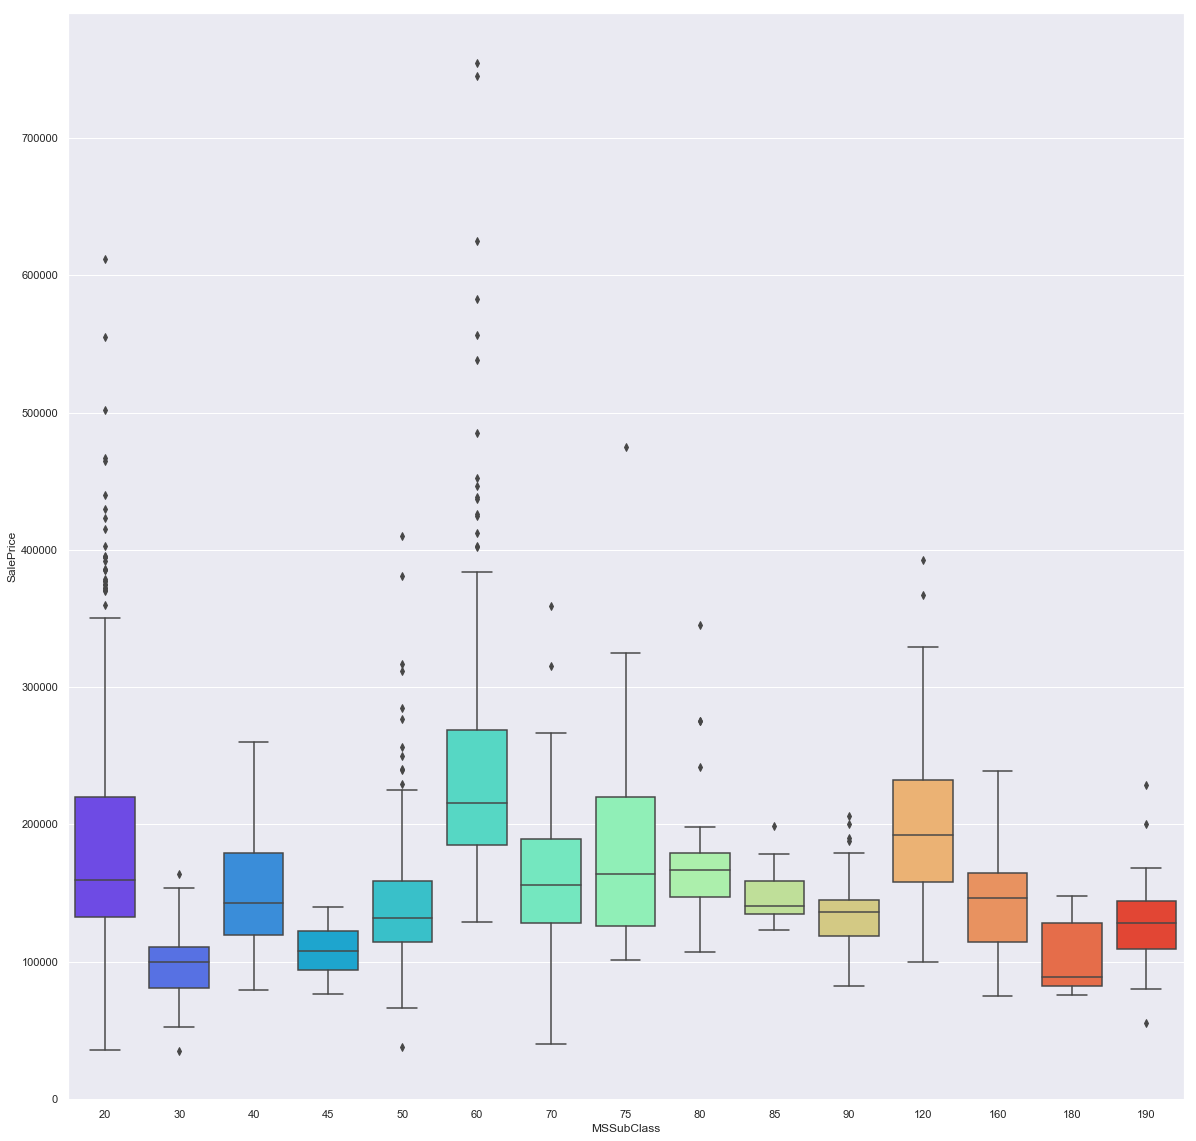

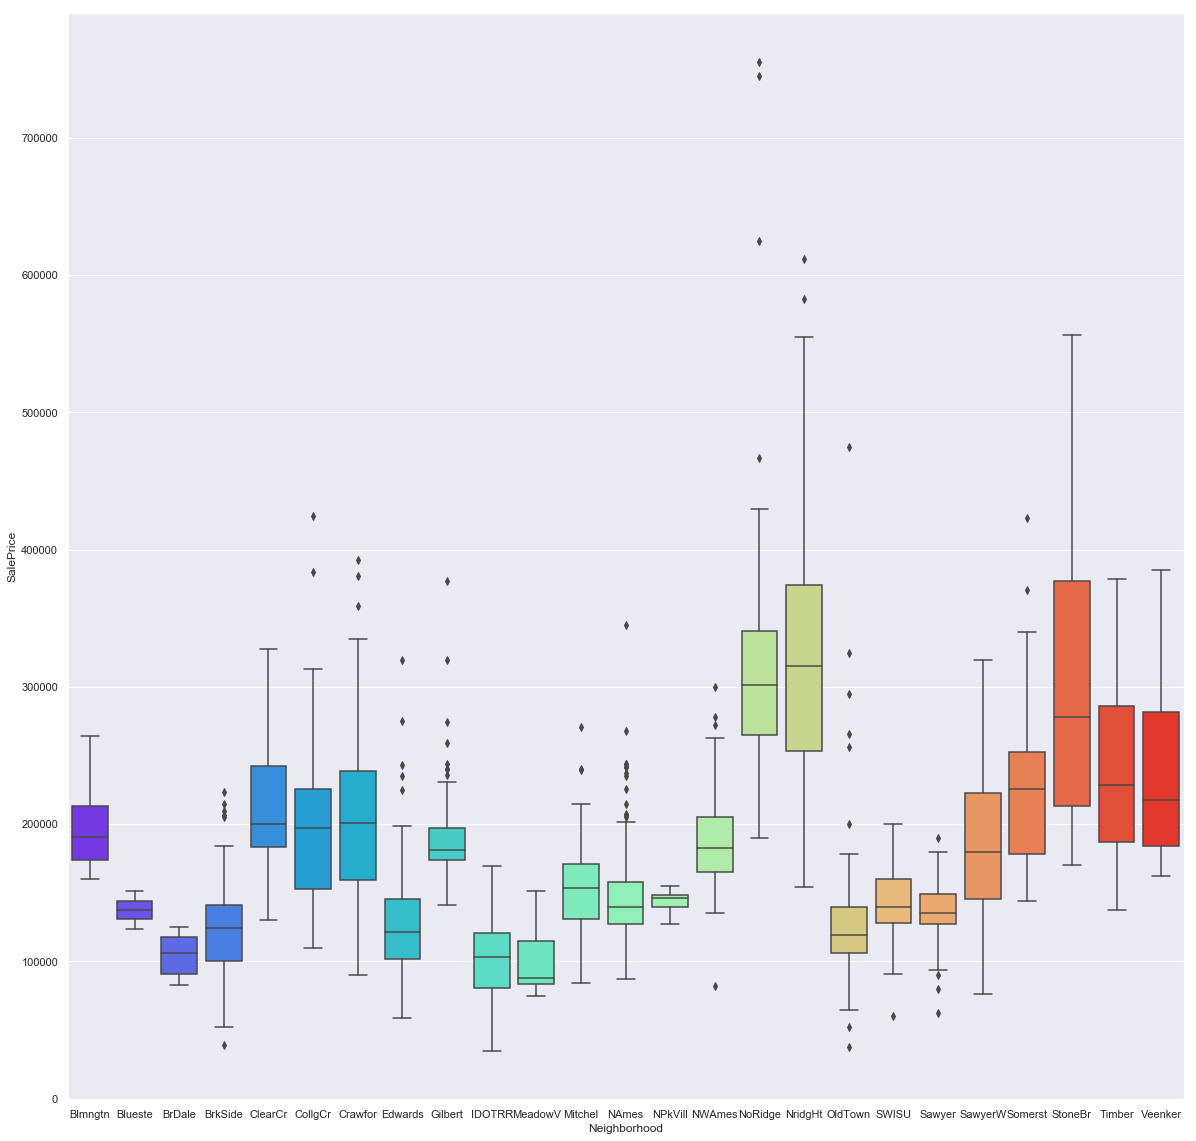

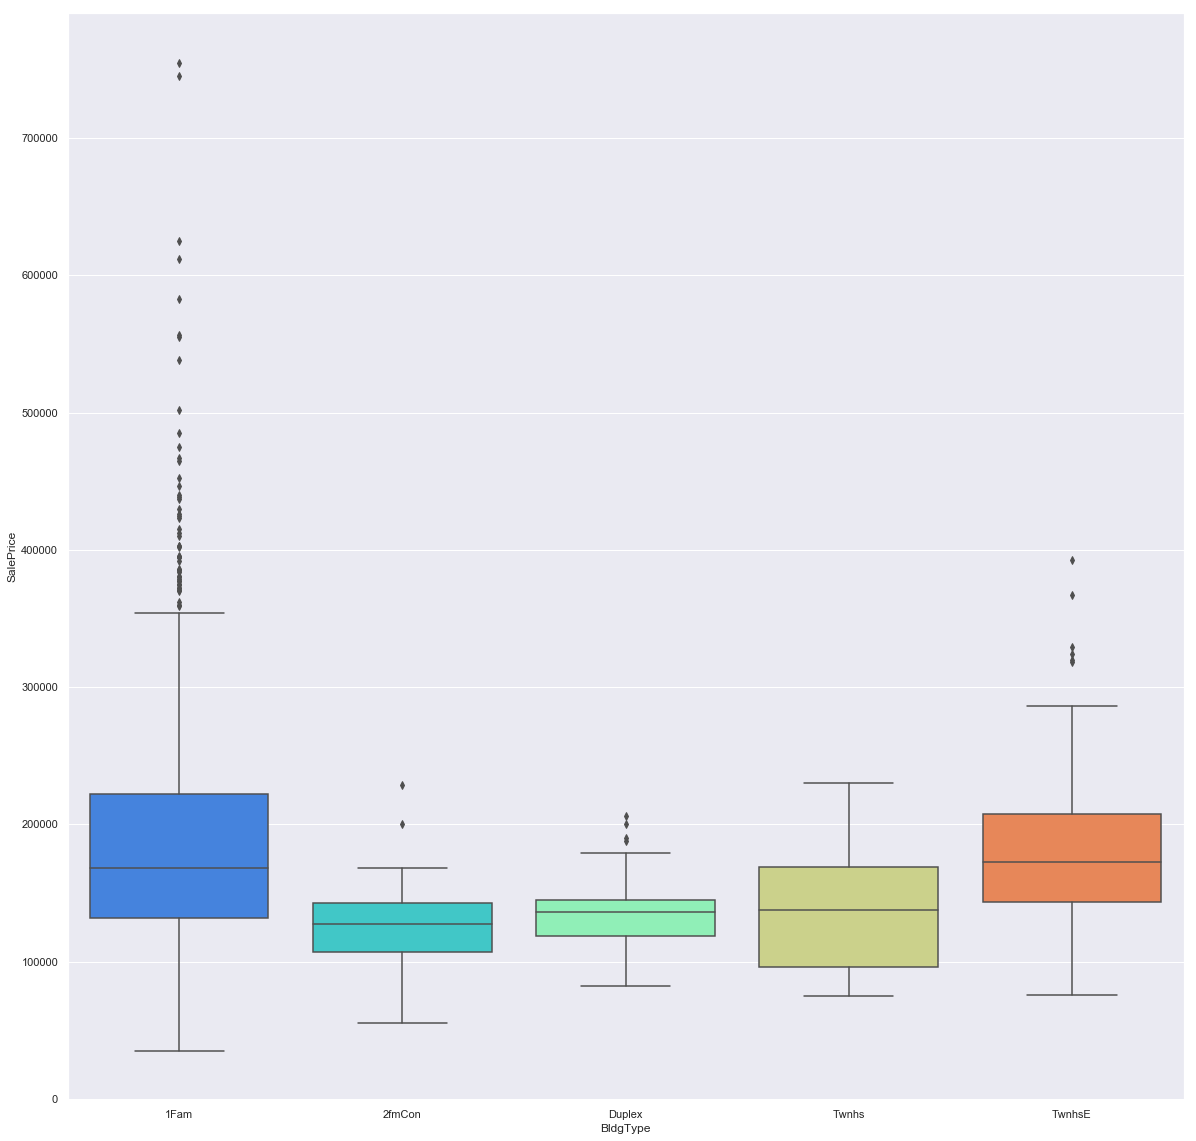

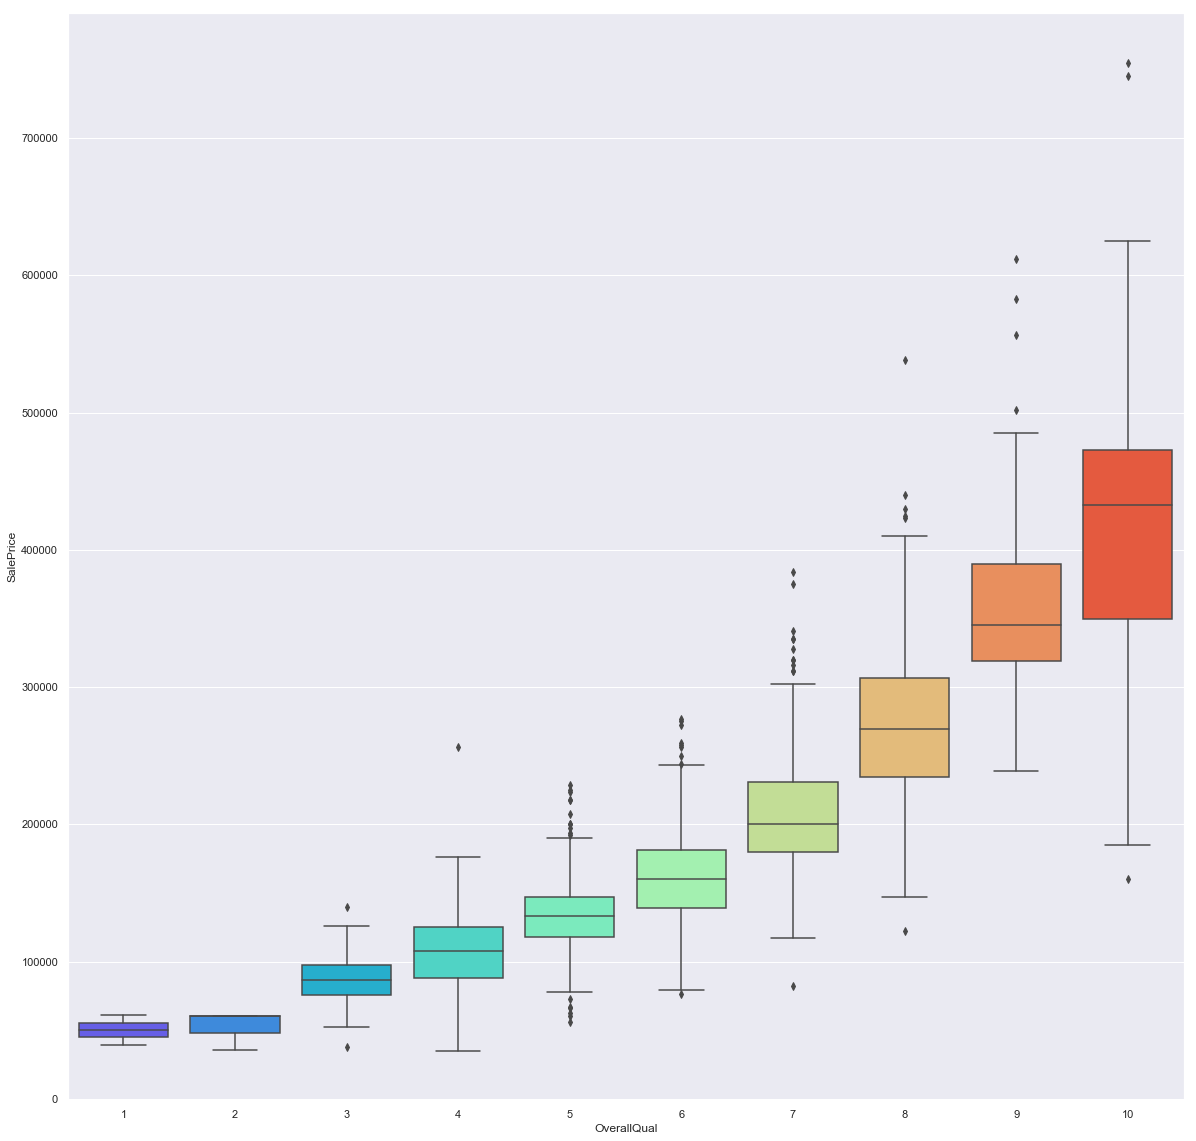

In [32]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.boxplot(x='MSSubClass',y=houseNumData['SalePrice'],data=houseCatData,palette='rainbow')
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.boxplot(x='Neighborhood',y=houseNumData['SalePrice'],data=houseCatData,palette='rainbow')
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.boxplot(x='BldgType',y=houseNumData['SalePrice'],data=houseCatData,palette='rainbow')
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.boxplot(x='OverallQual',y=houseNumData['SalePrice'],data=houseCatData,palette='rainbow')